In [1]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import itertools as it
import os
import networkx as nx
import scipy.optimize as opt
import warnings
warnings.filterwarnings('ignore')

In [31]:
state_dict={'Alabama':'AL','Alaska':'AK','Arkansas':'AR','Arizona':'AZ','California':'CA','Colorado':'CO',
           'Connecticut':'CT','Delaware':'DE','Florida':'FL','Georgia':'GA',
           'Hawaii':'HI','Idaho':"ID",'Illinois':'IL','Indiana':'IN','Iowa':'IA','Kansas':'KS','Kentucky':'KY',
           'Louisiana':'LA','Maine':'ME','Maryland':'MD','Massachusetts':'MA','Michigan':'MI','Minnesota':'MN',
           'Mississippi':'MS','Missouri':'MO','Montana':'MT','Nebraska':'NE','Nevada':'NV','New Hampshire':'NH','New Jersey':'NJ',
           'New Mexico':'NM','New York':'NY','North Carolina':'NC','North Dakota':'ND','Ohio':'OH','Oklahoma':'OK',
           'Oregon':'OR','Pennsylvania':'PA','Rhode island':'RI','South carolina':'SC','South dakota':'SD',
           'Tennessee':'TN','Texas':'TX','Utah':'UT','Vermont':'VT','Virginia':'VA','Washington':'WA',
            'West Virginia':'WV','Wisconsin':'WI','Wyoming':'WY'}

state_dict=dict(zip(state_dict.values(),state_dict.keys()))

In [3]:
###Using radar plot describe cahnages in inequality during and pre pandemic

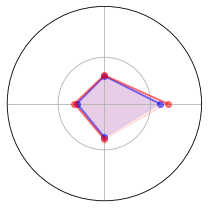

In [37]:

def radar_plot(ax,value_1,value_2):
    labels=['Age','Race&ethnicity','Income','Education']
    markers=[0,0.5,1.05]

    str_marker=['','','']

    angles=np.linspace(0,2*np.pi,len(labels),endpoint=False)

    
    anagles=np.concatenate((angles,[angles[0]]))
    
    ax.plot(angles,value_1,'o-',linewidth=2,alpha=0.5,color='blue')
    ax.fill(angles,value_1,alpha=0.1,color='blue')
    
    ax.plot(angles,value_2,'o-',linewidth=2,alpha=0.5,color='red')
    ax.fill(angles,value_2,alpha=0.1,color='red')

    ax.set_thetagrids(angles*180/np.pi,['','','',''])

    plt.yticks(markers,['','',''])

    #ax.set_thetagrids(np.degrees(angles), labels,fontsize=14)

    return ax
    
fig, ax = plt.subplots(figsize=(3, 3), subplot_kw=dict(polar=True))


gini_v1=[df['gini_normalized'].mean() for df in [age_gini1,race_gini1,income_gini1,education_gini1] ]
gini_v2=[df['gini_normalized'].mean() for df in [age_gini2,race_gini2,income_gini2,education_gini2] ]

radar_plot(ax,gini_v1,gini_v2)

plt.tight_layout()
fig.savefig('results/state_compare/ALL.png',dpi=300)

In [20]:
age_gini

,Unnamed: 0,gini,month,year,state,specialty
0,0,0.457562,-23,2017,AL,All
1,1,0.445157,-22,2017,AL,All
2,2,0.462361,-21,2017,AL,All
3,3,0.468347,-20,2017,AL,All
4,4,0.459270,-19,2017,AL,All
...,...,...,...,...,...,...
12114,7,0.557703,44,2022,WY,All
12115,8,0.568852,45,2022,WY,All
12116,9,0.586901,46,2022,WY,All
12117,10,0.591478,47,2022,WY,All


In [36]:
case='age'
age_gini=pd.read_csv('results/'+case+'/all_state_gini.csv')
age_gini=age_gini[age_gini['specialty']=='All']
age_gini=age_gini.groupby(['year','state'])['gini'].mean().reset_index()

age_gini1=age_gini[age_gini['year']==2019]
age_gini2=age_gini[age_gini['year']>2019]

minv=0
maxv=np.min([age_gini1['gini'].max(),age_gini2['gini'].max()])
maxv=0.60

print(case, minv,maxv)
age_gini1['gini_normalized']=(age_gini1['gini']-minv)/(maxv-minv)
age_gini2['gini_normalized']=(age_gini2['gini']-minv)/(maxv-minv)

case='race_ethnicity'
race_gini=pd.read_csv('results/'+case+'/all_state_gini.csv')
race_gini=race_gini[race_gini['specialty']=='All']
race_gini=race_gini.groupby(['year','state'])['gini'].mean().reset_index()


race_gini1=race_gini[race_gini['year']==2019]
race_gini2=race_gini[race_gini['year']>2019]

minv=0
maxv=np.min([race_gini1['gini'].max(),race_gini2['gini'].max()])
maxv=0.50

print(case, minv,maxv)
race_gini1['gini_normalized']=(race_gini1['gini']-minv)/(maxv-minv)
race_gini2['gini_normalized']=(race_gini2['gini']-minv)/(maxv-minv)

case='income'
income_gini=pd.read_csv('results/'+case+'/all_state_gini.csv')
income_gini=income_gini[income_gini['specialty']=='All']
income_gini=income_gini.groupby(['year','state'])['gini'].mean().reset_index()


income_gini1=income_gini[income_gini['year']==2019]
income_gini2=income_gini[income_gini['year']>2019]

minv=0
maxv=np.min([income_gini1['gini'].max(),income_gini2['gini'].max()])
maxv=0.20

print(case, minv,maxv)
income_gini1['gini_normalized']=(income_gini1['gini']-minv)/(maxv-minv)
income_gini2['gini_normalized']=(income_gini2['gini']-minv)/(maxv-minv)

case='education'
education_gini=pd.read_csv('results/'+case+'/all_state_gini.csv')
education_gini=education_gini[education_gini['specialty']=='All']
education_gini=education_gini.groupby(['year','state'])['gini'].mean().reset_index()


education_gini1=education_gini[education_gini['year']==2019]
education_gini2=education_gini[education_gini['year']>2019]

minv=0
maxv=np.min([education_gini1['gini'].max(),education_gini2['gini'].max()])
maxv=0.20

print(case, minv,maxv)
education_gini1['gini_normalized']=(education_gini1['gini']-minv)/(maxv-minv)
education_gini2['gini_normalized']=(education_gini2['gini']-minv)/(maxv-minv)



age 0 0.6
race_ethnicity 0 0.5
income 0 0.2
education 0 0.2


In [25]:
age_gini1

,year,state,gini,gini_normalized
86,2019,AL,0.463250,0.817263
87,2019,AR,0.389201,0.643387
88,2019,AZ,0.314842,0.468783
89,2019,CA,0.273588,0.371914
90,2019,CO,0.333749,0.513180
91,2019,CT,0.462617,0.815777
92,2019,DE,0.456084,0.800436
93,2019,FL,0.288736,0.407483
94,2019,GA,0.455297,0.798588
95,2019,IA,0.302457,0.439702


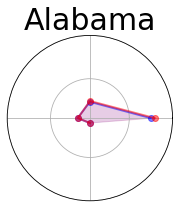

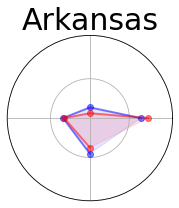

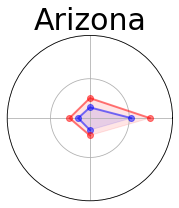

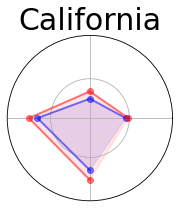

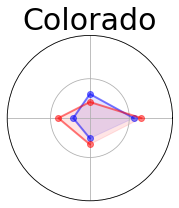

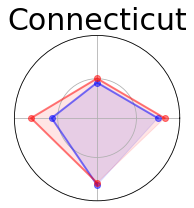

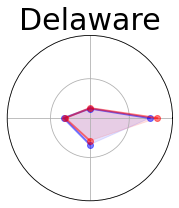

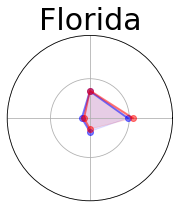

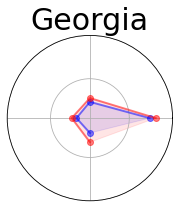

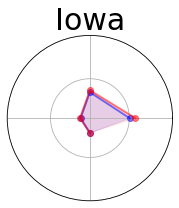

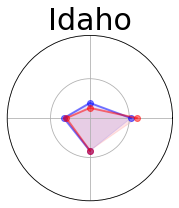

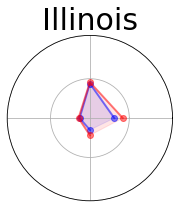

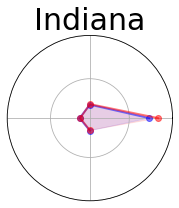

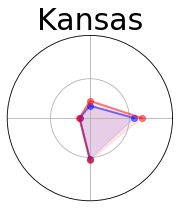

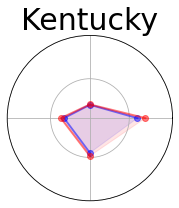

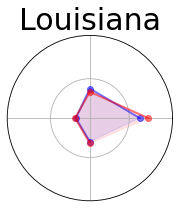

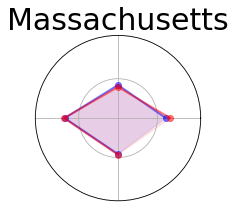

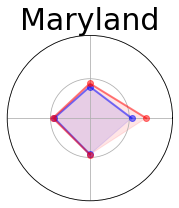

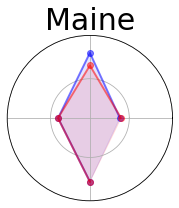

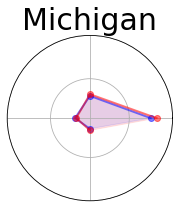

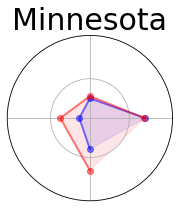

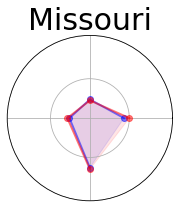

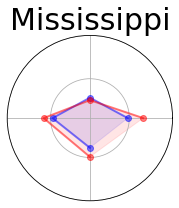

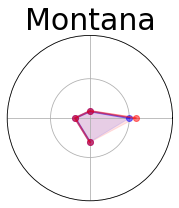

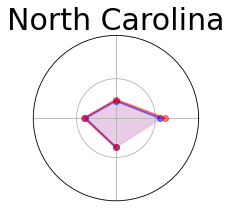

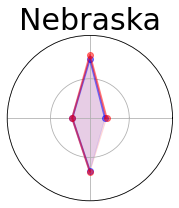

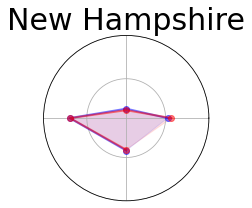

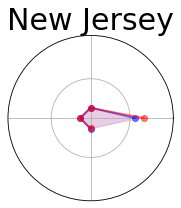

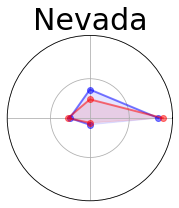

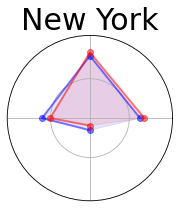

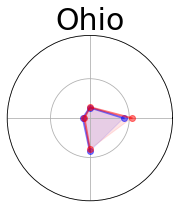

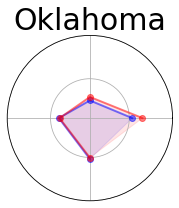

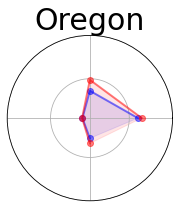

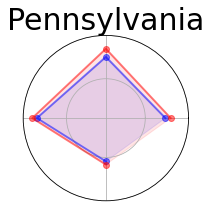

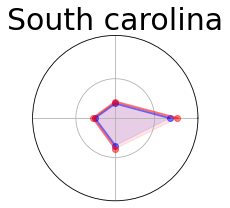

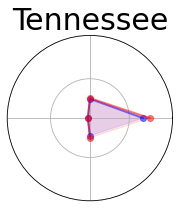

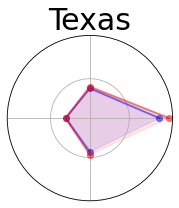

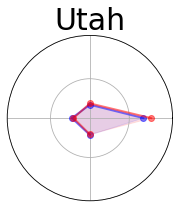

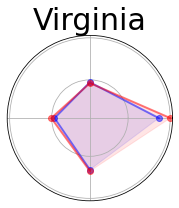

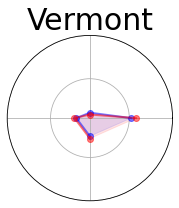

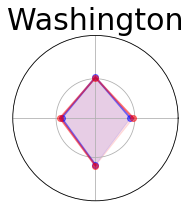

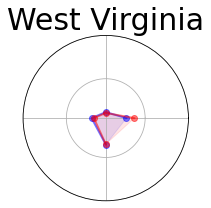

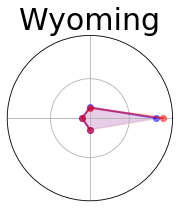

In [38]:

for state in pd.unique(education_gini['state']):

    gini_v1=[df[df['state']==state]['gini_normalized'].mean() for df in [age_gini1,race_gini1,income_gini1,education_gini1] ]
    gini_v2=[df[df['state']==state]['gini_normalized'].mean() for df in [age_gini2,race_gini2,income_gini2,education_gini2] ]
    
    fig, ax = plt.subplots(figsize=(3, 3), subplot_kw=dict(polar=True))

    ax=radar_plot(ax,gini_v1,gini_v2)
    ax.set_title(state_dict[state],fontsize=30)
    plt.tight_layout()
    fig.savefig('results/state_compare/'+state+'.png',dpi=300)
